In [1]:
import io
import pandas as pd
import requests
import datetime
from jupyterthemes.jtplot import style

style("onedork")

In [2]:
url = "https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle.xlsx?__blob=publicationFile"

In [3]:
with io.BytesIO() as f:
    f.write(requests.get(url).content)
    df = pd.read_excel(
        io=f, 
        sheet_name=3,
        header=8,
        index_col=0,
    )

In [4]:
drange = pd.date_range(
    start=datetime.date(2016, 1, 1), 
    end=datetime.date.today()
)

In [5]:
s = pd.Series(
    data=(df[d.strftime("%d.%m.")][int(d.strftime("%Y"))] for d in drange),
    index=drange
).dropna().astype(int)

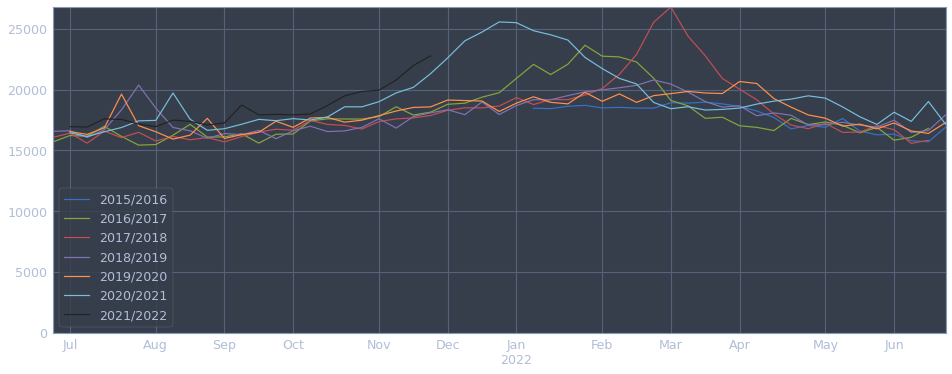

In [6]:
for y,df in s.resample("w").sum()[1:].groupby(lambda s:(s.year + (s.month / 12) - 7/12).astype(int)):
    df.index += datetime.timedelta(days=365*(2021 - y))
    df.plot(label=f"{y}/{y+1}",legend=True, figsize=(16,6), ylim=(0,s.resample("w").sum().max()))